
# Preprocesamiento de datos. Integración y transformación de datos📈

Paquetes necesarios que hay que instalar antes de comenzar:
- sklearn
- imbalanced-learn
- matplotlib
- seaborn
- pandas

# Repaso: Manejo de Pandas

## Selección de datos

Antes de nada vamos a recordar cómo seleccionar atributos e instancias.

Cargamos pandas.

In [1]:
import pandas as pd
from pandas.core.common import random_state

Leemos datos

In [2]:
df = pd.read_csv("sw_characters.csv")
print(df.head(2))

             name  height mass hair_color skin_color eye_color birth_year  \
0  Luke Skywalker   172.0   77      blond       fair      blue      19BBY   
1           C-3PO   167.0   75        NaN       gold    yellow     112BBY   

  gender homeworld species  
0   male  Tatooine   Human  
1    NaN  Tatooine   Droid  


---

Podemos consultar los atributos con:

In [3]:
df.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'species'],
      dtype='object')

## Selección de atributos

Sobre este conjunto de datos haremos las siguientes operaciones de
selección (en todas ellas el resultado es un nuevo conjunto de datos):

- selección de atributos concretos.
- selección de instancias concretas.

---

1. selección de 3 variables en concreto: **name**, **height**, **gender**.

In [4]:
# se seleccionan algunas caracteristicas: name, height
# and gender
data1 = df[["name", "height", "gender"]]
print(data1.head(3))

             name  height gender
0  Luke Skywalker   172.0   male
1           C-3PO   167.0    NaN
2           R2-D2    96.0    NaN


---

2. todas las variables excepto las indicadas a continuación:
**birth_year** y **gender**.

. . .

In [5]:
# se mantienen todas las variables exceptuando
# birth_year y gender
df2 = df.drop(['birth_year', 'gender'], axis=1)
df2.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'homeworld', 'species'],
      dtype='object')

## Selección de instancias

Es fácil filtrar un valor numérico o por valor exacto:

In [6]:
data1[data1["gender"].isnull()]

,name,height,gender
1,C-3PO,167.0,NaN
2,R2-D2,96.0,NaN
7,R5-D4,97.0,NaN


---

Se combina con & y | (no dobles) usando paréntesis:

In [7]:
selected = (data1["gender"].isnull()) & (data1["height"] < 100)
data1[selected]

,name,height,gender
2,R2-D2,96.0,NaN
7,R5-D4,97.0,NaN


---

Es más difícil si queremos filtrar según uno o varios valores:

In [8]:
df2.skin_color.describe()

count       85
unique      30
top       fair
freq        17
Name: skin_color, dtype: object

----

Por varios valores

In [9]:
df2[df2.skin_color.isin(["blonde", "brown"])]

,name,height,mass,hair_color,skin_color,eye_color,homeworld,species
28,Wicket Systri Warrick,88.0,20,brown,brown,brown,Endor,Ewok
50,Eeth Koth,171.0,NaN,black,brown,brown,Iridonia,Zabrak
67,Dexter Jettster,198.0,102,none,brown,yellow,Ojom,Besalisk
77,Tarfful,234.0,136,brown,brown,blue,Kashyyyk,Wookiee


---

Expresiones regulares

In [10]:
df2[(~df2.skin_color.isnull()) &
    (df2.skin_color.str.contains("blo*", case=True,regex=True))]

,name,height,mass,hair_color,skin_color,eye_color,homeworld,species
2,R2-D2,96.0,32,NaN,"white, blue",red,Naboo,Droid
37,Watto,137.0,NaN,black,"blue, grey",yellow,Toydaria,Toydarian
43,Ayla Secura,178.0,55,none,blue,hazel,Ryloth,Twi'lek
44,Dud Bolt,94.0,45,none,"blue, grey",yellow,Vulpter,Vulptereen
45,Gasgano,122.0,NaN,none,"white, blue",black,Troiken,Xexto
55,Mas Amedda,196.0,NaN,none,blue,blue,Champala,Chagrian
71,Ratts Tyerell,79.0,15,none,"grey, blue",NaN,Aleen Minor,Aleena
75,Shaak Ti,178.0,57,none,"red, blue, white",black,Shili,Togruta


## Renombrado de variables

Se puede hacer directamente editando columns:

In [11]:
df_tmp = df2.copy()
df_tmp.columns = ["V1","V2", "V3", "V4", "V5", "V6", "V7", "V8"]
df_tmp.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'], dtype='object')

Pero lo suyo es renombrar usando un diccionario:

In [12]:
df2.rename(columns={"skin_color": "color_piel"}, inplace=True)
df2.columns

Index(['name', 'height', 'mass', 'hair_color', 'color_piel', 'eye_color',
       'homeworld', 'species'],
      dtype='object')

## Conocer los tipos originales

`info` nos devuelve los tipos (`object` son `string`)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     object 
 3   hair_color  81 non-null     object 
 4   skin_color  85 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  43 non-null     object 
 7   gender      84 non-null     object 
 8   homeworld   77 non-null     object 
 9   species     82 non-null     object 
dtypes: float64(1), object(9)
memory usage: 6.9+ KB


---

Para conocer información sobre los valores numéricos se puede hacer:

In [14]:
df.describe()

,height
count,81.000000
mean,174.358025
std,34.770429
min,66.000000
25%,167.000000
50%,180.000000
75%,191.000000
max,264.000000


---

Y más en detalle se puede usar `describe` con un atributo:

In [15]:
df.species.describe()

count        82
unique       37
top       Human
freq         35
Name: species, dtype: object

---

Para ver las frecuencias se puede usar `values_counts()`.

In [16]:
df.species.value_counts().head()

species
Human       35
Droid        5
Gungan       3
Mirialan     2
Wookiee      2
Name: count, dtype: int64

Se puede normalizar (y no ordenar si se quiere):

In [17]:
df.species.value_counts(normalize=True).head()

species
Human       0.426829
Droid       0.060976
Gungan      0.036585
Mirialan    0.024390
Wookiee     0.024390
Name: proportion, dtype: float64

---

`value_counts()` también permite medir frecuencia de combinaciones:

In [18]:
df[["species", "hair_color"]].value_counts(normalize=True).head(8)

species   hair_color
Human     brown         0.181818
          black         0.103896
          none          0.038961
          blond         0.038961
Gungan    none          0.038961
Twi'lek   none          0.025974
Mirialan  black         0.025974
Human     white         0.025974
Name: proportion, dtype: float64

In [19]:
df[["species", "hair_color"]].value_counts(normalize=False, ascending=True).head()

species       hair_color
Aleena        none          1
Kel Dor       none          1
Mon Calamari  none          1
Muun          none          1
Nautolan      none          1
Name: count, dtype: int64

# Normalización de entrada

## Estandarización

Estandarización es un requisito de muchos modelos de ML, como los basados en
distancias.

`scikit-learn` permite hacer estandarización, hay [múltiples
opciones](]https://scikit-learn.org/stable/modules/preprocessing.html)

In [20]:
#Build a preprocessing object
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
iris_dataset = datasets.load_iris(as_frame=True)
X_iris = iris_dataset.data.copy()
scaler = StandardScaler().fit(X_iris)
#Check the mean and the std of the training set
print(scaler.mean_)
print(scaler.scale_)

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


---

Una vez entrenado se puede aplicar:

In [21]:
X_iris_scaled = scaler.transform(X_iris)
print(X_iris.iloc[:5,:])
print("StandardScaler: ")
print(X_iris_scaled[:5,:])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
StandardScaler: 
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


---

Confirmemos:

In [22]:
#Transform the dataset using the preprocessin object and check results
X_scaled = pd.DataFrame(scaler.fit_transform(X_iris), columns=X_iris.columns)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

sepal length (cm)   -4.736952e-16
sepal width (cm)    -7.815970e-16
petal length (cm)   -4.263256e-16
petal width (cm)    -4.736952e-16
dtype: float64
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


---

Visualmente

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


<Axes: ylabel='Density'>

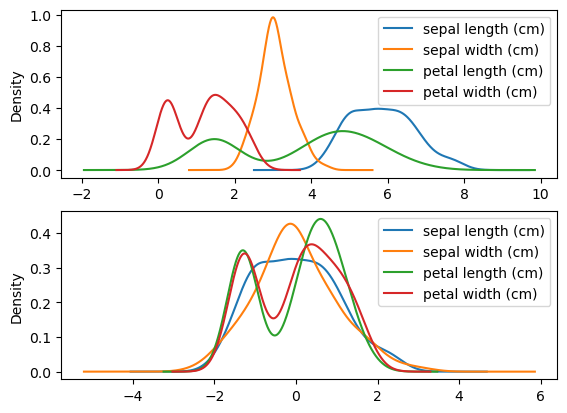

In [23]:
from matplotlib import pyplot as plt
fig,axs = plt.subplots(2,1)
X_iris.plot.kde(ax=axs[0])
X_scaled.plot.kde(ax=axs[1])

---

Otro muy común es `MinMaxScaler`:

In [24]:
from sklearn.preprocessing import MinMaxScaler
X_iris_scaled2 = MinMaxScaler().fit_transform(X_iris)
print(X_iris.iloc[:5,:])
print("MinMaxScaler: ")
print(X_iris_scaled2[:5,:])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
MinMaxScaler: 
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


## Normalización

La normalización es escalar las muestras individuales para que tenga una normal
unidad.

Es esencial para espresiones cuadráticas, o que usen un *kernel* que mida similaridad de
pares de instancias.

In [25]:
from sklearn.preprocessing import normalize
print(X_iris.iloc[:4,:])
X_normalized = pd.DataFrame(normalize(X_iris), columns=X_iris.columns)
print(X_normalized.iloc[:4,:])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.803773          0.551609           0.220644          0.031521
1           0.828133          0.507020           0.236609          0.033801
2           0.805333          0.548312           0.222752          0.034269
3           0.800030          0.539151           0.260879          0.034784


# Atributos categóricos

## Codificando atributos categóricos

Es común atributos con valores categóricos. `Scikit-learn` no es capaz de
procesarlos, por lo que es necesario transformarlo a valores numéricos.

- LabelEncoder y OrdinalEncoder: Asigna un valor numérico por cada categoría.

- OneHotEncoder: Codifica cada categoría usando una nueva columna.

. . .

Los Label/OrdinalEncoder asigna un orden entre las categorías que suele ser
'falso' si ese concepto no existe.

## LabelEncoder y OrdinalEncoder

Ambos asignan un valor numérico distinto a cada categoría.

Diferencia:

- `OrdinalEncoder` puede procesar varias columnas, se usa para características.

- `LabelEncoder` solo procesa un elemento, se usa para el atributo objetivo
  (*target*).

---

Advertencia: Evitar hacer esto:

In [26]:
from sklearn.preprocessing import LabelEncoder
targets_train = ["rubio", "moreno", "pelirrojo", "azul"]
targets_test = ["moreno", "pelirrojo"]

targets_train_num = LabelEncoder().fit_transform(targets_train)
targets_test_num = LabelEncoder().fit_transform(targets_test)
print(targets_train)
print(targets_train_num)
print(targets_test)
print(targets_test_num)

['rubio', 'moreno', 'pelirrojo', 'azul']
[3 1 2 0]
['moreno', 'pelirrojo']
[0 1]


. . .

Las etiquetas no coinciden.

---

Para evitarlo hay que hacer *fit* solo con el de entrenamiento.

In [27]:
labeler_target = LabelEncoder()
targets_train_num = labeler_target.fit_transform(targets_train)
targets_test_num = labeler_target.transform(targets_test)
print(targets_train)
print(targets_train_num)
print(targets_test)
print(targets_test_num)

['rubio', 'moreno', 'pelirrojo', 'azul']
[3 1 2 0]
['moreno', 'pelirrojo']
[1 2]


. . .

Guardar siempre los labeler (diccionario por nombre, ...).

---

Ejemplo:

In [28]:
data_train_df = pd.DataFrame({'age': [30, 41, 42, 21],
                         'pelo': targets_train,
                         'ojos': ['azules', 'verdes', 'marrones', 'marrones']})
data_test_df = pd.DataFrame({'age': [25, 23],
                             'pelo': targets_test,
                             'ojos': ['verdes', 'azules']})
print(data_train_df)

   age       pelo      ojos
0   30      rubio    azules
1   41     moreno    verdes
2   42  pelirrojo  marrones
3   21       azul  marrones


Vamos a aplicar el etiquetado.

---

- Opción 1: Sólo con Label Encoder:

In [29]:
labelers = {}
cols = {}
atribs = ["pelo", "ojos"]
data_train_num = data_train_df.copy()
data_test_num = data_test_df.copy()

for i in atribs:
    cols[i] = LabelEncoder()
    data_train_num[i] = cols[i].fit_transform(data_train_num[i])
    data_test_num[i] = cols[i].transform(data_test_num[i])

print(data_train_num)
print(data_test_num)

   age  pelo  ojos
0   30     3     0
1   41     1     2
2   42     2     1
3   21     0     1
   age  pelo  ojos
0   25     1     2
1   23     2     0


---

- Opción 2: Usando `OrdinalEncoder`

In [30]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
atribs = ["pelo", "ojos"]
labelers = OrdinalEncoder(dtype=np.int32) # Por defecto usa float
data_train_num = data_train_df.copy()
data_test_num = data_test_df.copy()

data_train_num[atribs] = labelers.fit_transform(data_train_df[atribs])
data_test_num[atribs] = labelers.transform(data_test_df[atribs])

print(data_train_num)
print(data_test_num)

   age  pelo  ojos
0   30     3     0
1   41     1     2
2   42     2     1
3   21     0     1
   age  pelo  ojos
0   25     1     2
1   23     2     0


## Inversión

También se puede invertir el etiquetado:

In [31]:
print(labelers.inverse_transform(data_train_num[atribs]))

[['rubio' 'azules']
 ['moreno' 'verdes']
 ['pelirrojo' 'marrones']
 ['azul' 'marrones']]


## *LabelEncoder*, *OrdinalEncoder* y orden

Esta codificación está considerando un orden entre categorías.

En algunos casos como ['pequeño', 'mediano', 'grande'] puede tener sentido pero
la mayoría de las veces no.

Cuando no (como 'pelo' o 'color' del ejemplo anterior) es necesario aplicar
*OneHotEncoder*.

---

`OneHotEncoder` crea una columna por categoría (ej: 'azul') indicando si se cumple
o no.

- Aumenta el número de columnas.

- Evita suponer un orden.

In [56]:
from sklearn.preprocessing import OneHotEncoder

# Por defecto es matriz sparse
encoder = OneHotEncoder(sparse_output=False, dtype=np.int32)
data_train_hot = encoder.fit_transform(data_train_df[atribs])
print(data_train_hot)

[[0 0 0 1 1 0 0]
 [0 1 0 0 0 0 1]
 [0 0 1 0 0 1 0]
 [1 0 0 0 0 1 0]]


---

Se puede convertir a *dataframe*:

In [57]:
new_columns = encoder.get_feature_names_out()
print(new_columns)
data_train_hot = pd.DataFrame(data_train_hot, columns=new_columns)
# Copio el resto de atributos
data_train_hot['age'] = data_train_df['age']
print(data_train_hot)

['pelo_azul' 'pelo_moreno' 'pelo_pelirrojo' 'pelo_rubio' 'ojos_azules'
 'ojos_marrones' 'ojos_verdes']
   pelo_azul  pelo_moreno  pelo_pelirrojo  pelo_rubio  ojos_azules  \
0          0            0               0           1            1   
1          0            1               0           0            0   
2          0            0               1           0            0   
3          1            0               0           0            0   

   ojos_marrones  ojos_verdes  age  
0              0            0   30  
1              0            1   41  
2              1            0   42  
3              1            0   21  


## Dummies en Pandas

Pandas ya soporta el *hotencoding*, pero presenta problemas.

In [35]:
pd.get_dummies(data_train_df[['pelo', 'ojos']])

,pelo_azul,pelo_moreno,pelo_pelirrojo,pelo_rubio,ojos_azules,ojos_marrones,ojos_verdes
0,False,False,False,True,True,False,False
1,False,True,False,False,False,False,True
2,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False


Recomiendo usar `OneHotEncoder` por tener más opciones.

## Valores binarios

Si el valor numérico es binario, ej: vivo/muerto no es necesario aplicar el
*hotencoding*.

In [36]:
columns = ["Employed", "Place", 'Browser']
X = [['employed', 'from US', 'uses Safari'], ['unemployed', 'from Europe', 'uses Firefox'], ['unemployed', 'from Asia', 'uses Chrome']]
enc = OneHotEncoder(drop='if_binary')
trans_X = enc.fit_transform(X)
transformed_X = pd.DataFrame(trans_X.toarray(), columns=enc.get_feature_names_out())
print(transformed_X)

   x0_unemployed  x1_from Asia  x1_from Europe  x1_from US  x2_uses Chrome  \
0            0.0           0.0             0.0         1.0             0.0   
1            1.0           0.0             1.0         0.0             0.0   
2            1.0           1.0             0.0         0.0             1.0   

   x2_uses Firefox  x2_uses Safari  
0              0.0             1.0  
1              1.0             0.0  
2              0.0             0.0  


## LabelBinarizer

`OneHotEncoder` es para convertir atributos, `LabelBinarizer` es para convertir
el target (por ejemplo: para redes neuronales).

La diferencia principal es:

- `LabelBinarizer` devuelve una matriz numpy, `OneHotEncoder` devuelve por
  defecto matriz *sparse*.

- `LabelBinarizer` devuelve de tipo entero, `OneHotEncoder` devuelve por defecto de
  tipo `float`.

- `OneHotEncoder` puede convertir distintos atributos a la vez, `LabelBinarizer`
  no.

---

In [37]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit_transform(data_train_df['ojos'])
# Da error
# lb.fit_transform(data_train_df['ojos','pelo'])

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

¿Cuándo usar `LabelBinarizer`?

. . .

Para etiquetar el objetivo.

## Multilabel

¿Qué pasa cuando un atributo es una combinación de valores?

Ejemplo: género de una película.

La clase `Multilabel` permite identificar:

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
print(mlb.fit_transform([{'sci-fi', 'thriller'}, {'comedy'}]))
list(mlb.classes_)

[[0 1 1]
 [1 0 0]]


['comedy', 'sci-fi', 'thriller']

---

Aviso: Trabaja con vector de conjunto, no con vector:

In [39]:
mlb = MultiLabelBinarizer()
print(mlb.fit_transform(['sci-fi', 'thriller', 'comedy']))
list(mlb.classes_)

[[1 1 0 0 1 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 1 1 1 0 0 1 0 1 0]
 [0 1 1 1 0 0 0 0 1 1 0 0 0 1]]


['-', 'c', 'd', 'e', 'f', 'h', 'i', 'l', 'm', 'o', 'r', 's', 't', 'y']

La otra opción es un vector de vectores:

In [40]:
mlb = MultiLabelBinarizer()
print(mlb.fit_transform([['sci-fi', 'thriller'], ['comedy']]))
list(mlb.classes_)

[[0 1 1]
 [1 0 0]]


['comedy', 'sci-fi', 'thriller']

# Distancias de atributos categóricos

Tal y como hemos visto en teoría, vamos a explorar algunas formas de estimar las distancias entre atributos nominales. Nos ceñiremos a scikit-learn y su paquete https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.DistanceMetric.html.

## Distancia Coseno

Para calcular el coseno de dos elementos, necesitaremos una conversión a atributos numéricos. Consideremos, por ejemplo, la transformación One-hot-encoding.


In [41]:
# obtenemos la matriz de distancias con el coseno de los datos de transformed_X
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(transformed_X)
# imprimir la matriz de distancias
print(cosine_similarity(transformed_X))

[[1.         0.         0.        ]
 [0.         1.         0.33333333]
 [0.         0.33333333 1.        ]]


## Distancia Jaccard

In [42]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import LabelBinarizer

# Datos de ejemplo de un conjunto de juguete donde dos atributos son nominales y pueden tener valores repetidos
data = np.array([
    ['rojo', 'azul'],
    ['verde', 'rojo'],
    ['azul', 'verde'],
    ['rojo', 'rojo']
])

# Seleccionamos los dos atributos que nos interesan
atributo1 = data[:, 0]  # Primer atributo
atributo2 = data[:, 1]  # Segundo atributo

# Usamos LabelBinarizer para convertir los atributos nominales en representación binaria
lb = LabelBinarizer()

# Convertimos ambos atributos
atributo1_bin = lb.fit_transform(atributo1)
atributo2_bin = lb.fit_transform(atributo2)

# Concatenamos las dos matrices binarias para representar los atributos combinados
combined_attributes = np.hstack((atributo1_bin, atributo2_bin))

# Calculamos la distancia de Jaccard
distancia_jaccard = pairwise_distances(combined_attributes, metric='jaccard')

# Mostramos el resultado
print("Distancias de Jaccard:\n", distancia_jaccard)


Distancias de Jaccard:
 [[0.         1.         1.         0.66666667]
 [1.         0.         1.         0.66666667]
 [1.         1.         0.         1.        ]
 [0.66666667 0.66666667 1.         0.        ]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


## Value difference metric

Instalar la biblioteca imbalanced-learn en primer lugar:
https://anaconda.org/conda-forge/imbalanced-learn

In [43]:
from imblearn.metrics.pairwise import ValueDifferenceMetric


# Datos de ejemplo (atributos nominales y clase)
data = pd.DataFrame({
    'atributo1': ['rojo', 'verde', 'azul', 'rojo', 'verde', 'azul'],
    'atributo2': ['caliente', 'frío', 'caliente', 'frío', 'caliente', 'frío'],
    'clase': [1, 1, 0, 0, 1, 0]
})

# es necesario hacer una codificacion de las variables nominales en binarias con OrdinalEncoder por ejemplo
# para poder aplicar la distancia VDM
from sklearn.preprocessing import OrdinalEncoder
data_encoded = OrdinalEncoder(dtype=np.int32).fit_transform(data[['atributo1', 'atributo2']])


# aplicamos la distancia VDM a los atributos 1 y 2
vdm = ValueDifferenceMetric().fit(data_encoded, data['clase'])

pairwise_distance = vdm.pairwise(data_encoded)

#a continuacion se muestra la matriz de distancias
print(pairwise_distance)

[[0.         1.44444444 1.         0.44444444 1.         1.44444444]
 [1.44444444 0.         4.44444444 1.         0.44444444 4.        ]
 [1.         4.44444444 0.         1.44444444 4.         0.44444444]
 [0.44444444 1.         1.44444444 0.         1.44444444 1.        ]
 [1.         0.44444444 4.         1.44444444 0.         4.44444444]
 [1.44444444 4.         0.44444444 1.         4.44444444 0.        ]]


## Estudio de la correlación entre atributos

Con el método corr de $pandas$ se puede analizar la correlación entre atributos para intentar observar si hay redundancia entre los mismos.

In [44]:
#si intentamos obtener la matriz de correlación de un dataframe que contiene variables categóricas, obtendremos un error
#correlation_matrix = df.corr()

#vamos a usar una versión con una transformación previa de las variables categóricas a numéricas
correlation_matrix = transformed_X.corr()
print(correlation_matrix)


                 x0_unemployed  x1_from Asia  x1_from Europe  x1_from US  \
x0_unemployed              1.0           0.5             0.5        -1.0   
x1_from Asia               0.5           1.0            -0.5        -0.5   
x1_from Europe             0.5          -0.5             1.0        -0.5   
x1_from US                -1.0          -0.5            -0.5         1.0   
x2_uses Chrome             0.5           1.0            -0.5        -0.5   
x2_uses Firefox            0.5          -0.5             1.0        -0.5   
x2_uses Safari            -1.0          -0.5            -0.5         1.0   

                 x2_uses Chrome  x2_uses Firefox  x2_uses Safari  
x0_unemployed               0.5              0.5            -1.0  
x1_from Asia                1.0             -0.5            -0.5  
x1_from Europe             -0.5              1.0            -0.5  
x1_from US                 -0.5             -0.5             1.0  
x2_uses Chrome              1.0             -0.5        

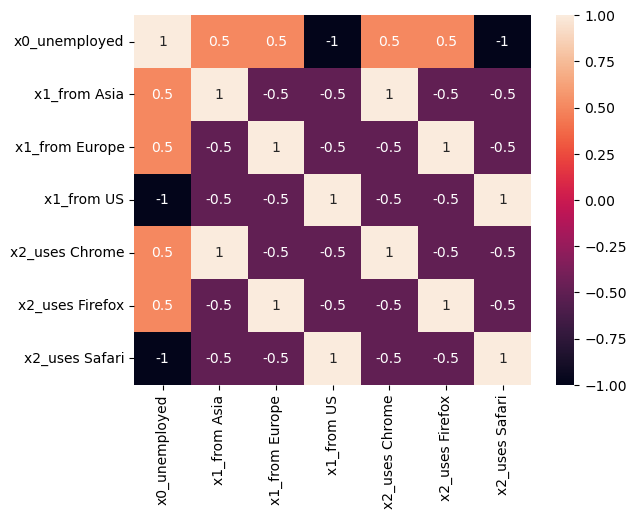

In [45]:
#vamos a imprimir la matriz de correlación crear un mapa de calor
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()


<Axes: >

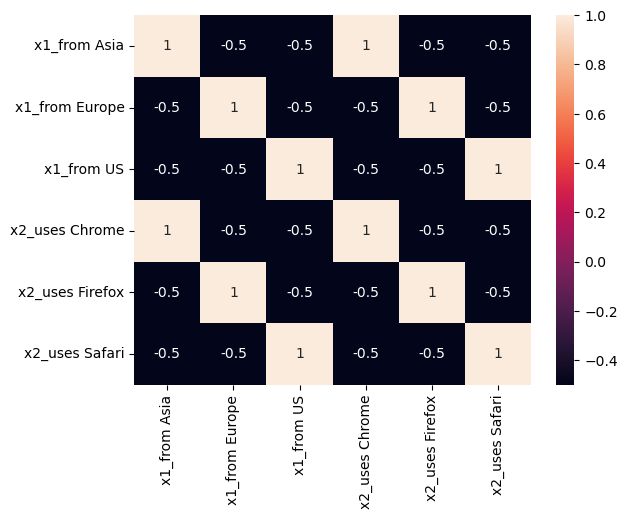

In [46]:
#vamos a eliminar una de las variables que está totalmente correlacionada con otra
transformed_X = transformed_X.drop(columns='x0_unemployed')

correlation_matrix = transformed_X.corr()
sns.heatmap(correlation_matrix, annot=True)

# Pipelines y ColumnTransformer

## Aplicar `OneHotEncoder`

Scikit-learn permite combinar transformaciones con `ColumnTransformer`.

In [47]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['pelo', 'ojos']),
  remainder='passthrough') # Para ignorar el resto y no dar error

transformed = transformer.fit_transform(data_train_df)
data_train_num = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
print(data_train_num)

   onehotencoder__pelo_azul  onehotencoder__pelo_moreno  \
0                       0.0                         0.0   
1                       0.0                         1.0   
2                       0.0                         0.0   
3                       1.0                         0.0   

   onehotencoder__pelo_pelirrojo  onehotencoder__pelo_rubio  \
0                            0.0                        1.0   
1                            0.0                        0.0   
2                            1.0                        0.0   
3                            0.0                        0.0   

   onehotencoder__ojos_azules  onehotencoder__ojos_marrones  \
0                         1.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           1.0   
3                         0.0                           1.0   

   onehotencoder__ojos_verdes  remainder__age  
0                       

---

`ColumnTransformer` permite procesar distintos datasets.

En conjunción con make_column_selector (que permite filtrar atributos por su tipo) es muy potente y cómodo.

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

X = pd.DataFrame({'city': ['London', 'London', 'Paris', 'Sallisaw'],
                  'rating': [5, 3, 4, 5]})
ct = make_column_transformer(
      (StandardScaler(),
       make_column_selector(dtype_include=np.number)),  # rating
      (OneHotEncoder(),
       make_column_selector(dtype_include=object)))  # city
ct.fit_transform(X)

array([[ 0.90453403,  1.        ,  0.        ,  0.        ],
       [-1.50755672,  1.        ,  0.        ,  0.        ],
       [-0.30151134,  0.        ,  1.        ,  0.        ],
       [ 0.90453403,  0.        ,  0.        ,  1.        ]])

## Pipelines

Facilitan aplicar distintos preprocesamientos.

Un *pipeline* se compone de una serie de transformaciones que van sufriendo el
dataset (se puede incluir el modelo a aprender).

Un *pipeline* se usa igual que un modelo.

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
iris_targets = iris_dataset.target
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, iris_targets,
                                                    random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9736842105263158

---

También se puede aplicar con validación cruzada:

In [50]:
from sklearn.model_selection import cross_val_score

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
scores = cross_val_score(pipe, X_iris, iris_targets, cv=5)
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
0.9666666666666666


Por comodidad se puede usar `make_pipeline` con tantos atributos como
procesamientos y/o mdelos.

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC(C=1))
cross_val_score(model, X_iris, iris_targets, cv=5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

## Generación de atributos polinomiales

A veces es útil añadir complejidad a un modelo añadiendo características no lineales. `scikit-learn` incorpora dos estrategias:

- Polinomiales.

- Usando *splines*, trozos polinomiales.

---

## Polinomiales

Construye atributos como combinación polinomial de los existentes.

Si la entrada es [a, b] y se usa grado 2, los atributos polinomiales serían [1, a, b, a^2, ab, b^2].

---

In [52]:
from sklearn.preprocessing import PolynomialFeatures
#Build a polynomial features generator for the squared augmentation, this transforms (X1,X2) to (1,X1,X2,X1^2,X1X2,X2^2)
poly = PolynomialFeatures(degree=2).fit(X_iris)
print(X_iris.iloc[:3,])
poly_X = pd.DataFrame(poly.transform(X_iris))
print(poly_X.iloc[:3,])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
    0    1    2    3    4      5      6     7     8      9     10    11    12  \
0  1.0  5.1  3.5  1.4  0.2  26.01  17.85  7.14  1.02  12.25  4.90  0.70  1.96   
1  1.0  4.9  3.0  1.4  0.2  24.01  14.70  6.86  0.98   9.00  4.20  0.60  1.96   
2  1.0  4.7  3.2  1.3  0.2  22.09  15.04  6.11  0.94  10.24  4.16  0.64  1.69   

     13    14  
0  0.28  0.04  
1  0.28  0.04  
2  0.26  0.04  


---

A veces interesa solo las interacciones, se puede usar `interaction_only`.

In [53]:
#Sometimes only interaction terms are required, which can be obtained by setting interaction_only=True
poly = PolynomialFeatures(degree=2, interaction_only=True).fit(X_iris)
print(X_iris.iloc[:5,])
poly_X = pd.DataFrame(poly.transform(X_iris))
print(poly_X.iloc[:5,])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
    0    1    2    3    4      5     6     7     8     9     10
0  1.0  5.1  3.5  1.4  0.2  17.85  7.14  1.02  4.90  0.70  0.28
1  1.0  4.9  3.0  1.4  0.2  14.70  6.86  0.98  4.20  0.60  0.28
2  1.0  4.7  3.2  1.3  0.2  15.04  6.11  0.94  4.16  0.64  0.26
3  1.0  4.6  3.1  1.5  0.2  14.26  6.90  0.92  4.65  0.62  0.30
4  1.0  5.0  3.6  1.4  0.2  18.00  7.00  1.00  5.04  0.72  0.28


# Ejercicios

Leamos el conjunto de datos para practicar.

In [54]:
import pandas as pd
df = pd.read_csv("tanzania_water_pump_org.csv")
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

---

## Ejercicios de tratamiento de datos básico

1. Mostrar algún diagrama para mostrar casos de nulos.

2. Eliminar atributos con un número de nulos mayor que el 30%.

3. Mostrar distribución de nulos.

4. Comparar el número de filas eliminando y no eliminando nulos.

5. Eliminar nulos sobre el original aplicando reemplazo correspondiente.


## Ejercicios de transformación

1. Cree atributos polinomiales sobre iris y aplique KNN --> ¿Hay diferencias de rendimiento?

## Ejercicios de etiquetado

1. Borrar la descripción.

2. En el dataset de IMDB etiquetar el género usando el MultiLabel.

3. Etiquetar el director usando etiquetado.

4. Etiquetar el director usando HotEncoder.

5. Comparar resultados entre 3 y 4.

## Ejercicios de distancia

1. Aplica la distancia de Jaccard entre dos películas del mismo director (¿Repite actores?)

2. Repite el punto 1 para las otras distancias de atributos nominales vistas (Coseno por ej.)

3. Utliza el parámetro "metric=cosine" en KNN frente a la distancia euclídea para ver qué diferencia de rendimiento hay (aplica OneHotEncoding para hacer la distancia coseno al conjunto de datos).

## Ejercicios de Pipeline

1. Aplicar con ColumnTransformer y Pipeline para automatizar las transformaciones anteriores con el IMDB (sin aplicar el paso 5 anterior).